# **Installing and settingup wandb.**

In [ ]:
# Weights and Biases for experiment tracking
!pip install wandb
!wandb login

     |████████████████████████████████| 1.4MB 4.6MB/s 
     |████████████████████████████████| 460kB 19.6MB/s 
     |████████████████████████████████| 102kB 12.1MB/s 
     |████████████████████████████████| 112kB 33.8MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=b8782a3dcd94fb4e2f1be06c3b130707703228d3b669de077738ad2f03c28375
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=6f9386a0e2e1234f02d5c7fee3a24ce58c011a705d6fc87c76a65692ccfba165
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=c

# **Importing important libraries.**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


# **Preparing the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_path = "/content/drive/My Drive/sign_mnist_train.csv"
test_path = "/content/drive/My Drive/sign_mnist_test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,182,182,181,181,182,181,181,181,181,179,178,178,176,177,178,159,47,30,39,180,182,183,183,183,183,185,184,185,183,184,...,97,97,95,90,92,101,125,160,191,202,213,215,96,88,109,216,208,207,203,178,151,112,87,80,76,80,86,97,102,103,108,132,170,194,214,203,197,205,209,215


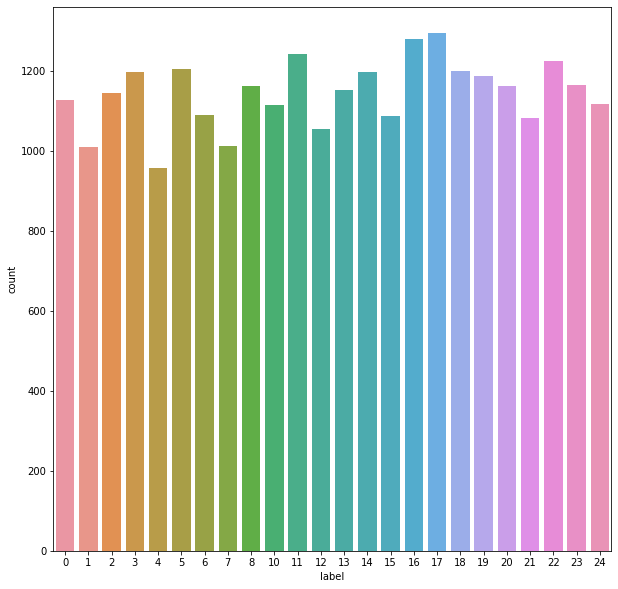

In [ ]:
plt.figure(figsize = (10,10)) # Label Count
sns.countplot(train_df['label'])

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)


In [ ]:
x_train = train_df.values
x_test = test_df.values

In [ ]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [ ]:
x_train.shape

(27455, 784)

In [ ]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

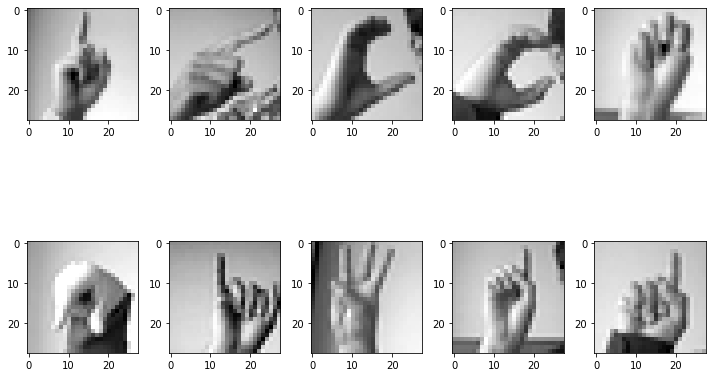

In [ ]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# **Hyper-parameter tuning**

In [ ]:
import keras
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

class Swish(keras.layers.Activation):
  def __init__(self, activation, **kwargs):
    super(Swish, self).__init__(activation, **kwargs)
    self.__name__ = 'Swish'
  def swish(inputs):
    return inputs * keras.activations.sigmoid(inputs)

  get_custom_objects().update({'Swish': Swish(swish)})

In [ ]:
 class Mish(keras.layers.Activation):
  def __init__(self, activation, **kwargs):
    super(Mish, self).__init__(activation, **kwargs)
    self.__name__ ='Mish'
  def mish(inputs):
    return inputs * keras.activations.tanh(keras.activations.softplus(inputs))
  get_custom_objects().update({'Mish': Mish(mish)})

In [ ]:
def train():
  config_defaults = {'epoch': 20, 'activation':'relu', 'learning_rate':0.001, 'optimizer': 'adam'}
  wandb.init(config=config_defaults, entity="shweta", project="Sign Language Detection")

  datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


  datagen.fit(x_train)


  model = Sequential()
  model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation=wandb.config.activation , input_shape = (28,28,1)))
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation=wandb.config.activation))
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation=wandb.config.activation))
  model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
  model.add(Flatten())
  model.add(Dense(units = 512 ,  activation=wandb.config.activation))
  model.add(Dropout(0.2))
  model.add(Dense(units = 24 , activation = 'softmax'))

  from keras.optimizers import Adam, RMSprop

  if wandb.config.optimizer=='adam':
    optimizer=Adam(learning_rate=wandb.config.learning_rate)
  elif wandb.config.optimizer=='rmsprop':
    optimizer=RMSprop(learning_rate=wandb.config.learning_rate)

  model.compile(optimizer = wandb.config.optimizer , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


  history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = wandb.config.epoch , validation_data = (x_test, y_test),callbacks=[wandb.keras.WandbCallback( validation_data=(x_test, y_test))])



In [ ]:
sweep_config = {
  "name": "Sign Language Detection Sweep1",
  'metric': {
      'name': 'accuracy',
      'goal': 'maximize'
    },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.1,0.01,0.001,]
        },
        "Activation_Function": {
            "values": ['relu', 'Swish','Mish']
        },
        "optimizer": {
            "values": ['adam', 'rmsprop']
        }
    }
}

In [ ]:
import wandb
sweep_id = wandb.sweep(sweep_config,entity="shweta", project="Sign Language Detection")

Create sweep with ID: tql5j8lb
Sweep URL: https://app.wandb.ai/shweta/Sign%20Language%20Detection/sweeps/tql5j8lb


In [ ]:
wandb.agent(sweep_id, function=train)

wandb: Agent Starting Run: t1zmz963 with config:
	Activation_Function: relu
	learning_rate: 0.1
	optimizer: adam
wandb: Agent Started Run: t1zmz963


Epoch 1/20
215/215 [==============================] - 8s 38ms/step - loss: 1.9774 - accuracy: 0.3965 - val_loss: 0.6598 - val_accuracy: 0.7900
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6911 - accuracy: 0.7673 - val_loss: 0.3710 - val_accuracy: 0.8776
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.3920 - accuracy: 0.8645 - val_loss: 0.1778 - val_accuracy: 0.9338
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2480 - accuracy: 0.9174 - val_loss: 0.1019 - val_accuracy: 0.9724
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1686 - accuracy: 0.9446 - val_loss: 0.0638 - val_accuracy: 0.9801
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1307 - accuracy: 0.9569 - val_loss: 0.0606 - val_accuracy: 0.9816
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1072 - accuracy: 0.9645 - val_loss: 0.0341 - val_accuracy: 0.9958

Epoch 1/20
215/215 [==============================] - 8s 38ms/step - loss: 2.1074 - accuracy: 0.3562 - val_loss: 0.9146 - val_accuracy: 0.7047
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.8595 - accuracy: 0.7183 - val_loss: 0.3928 - val_accuracy: 0.8705
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4406 - accuracy: 0.8519 - val_loss: 0.1879 - val_accuracy: 0.9380
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2634 - accuracy: 0.9103 - val_loss: 0.1197 - val_accuracy: 0.9545
Epoch 5/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1763 - accuracy: 0.9405 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1211 - accuracy: 0.9591 - val_loss: 0.1051 - val_accuracy: 0.9647
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0902 - accuracy: 0.9696 - val_loss: 0.0649 - val_accuracy: 0.9780

Epoch 1/20
215/215 [==============================] - 8s 40ms/step - loss: 2.0104 - accuracy: 0.3837 - val_loss: 0.6675 - val_accuracy: 0.7959
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 0.7047 - accuracy: 0.7667 - val_loss: 0.4004 - val_accuracy: 0.8374
Epoch 3/20
215/215 [==============================] - 7s 32ms/step - loss: 0.3778 - accuracy: 0.8720 - val_loss: 0.1807 - val_accuracy: 0.9453
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.2495 - accuracy: 0.9149 - val_loss: 0.0925 - val_accuracy: 0.9759
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1680 - accuracy: 0.9430 - val_loss: 0.0813 - val_accuracy: 0.9721
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1297 - accuracy: 0.9568 - val_loss: 0.0911 - val_accuracy: 0.9658
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1037 - accuracy: 0.9659 - val_loss: 0.0674 - val_accuracy: 0.9755

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.1051 - accuracy: 0.3548 - val_loss: 0.8435 - val_accuracy: 0.7036
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.8490 - accuracy: 0.7191 - val_loss: 0.4472 - val_accuracy: 0.8468
Epoch 3/20
215/215 [==============================] - 7s 32ms/step - loss: 0.4336 - accuracy: 0.8543 - val_loss: 0.2255 - val_accuracy: 0.9193
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.2577 - accuracy: 0.9128 - val_loss: 0.1058 - val_accuracy: 0.9752
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1698 - accuracy: 0.9418 - val_loss: 0.0800 - val_accuracy: 0.9723
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1227 - accuracy: 0.9578 - val_loss: 0.0719 - val_accuracy: 0.9791
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0929 - accuracy: 0.9687 - val_loss: 0.0489 - val_accuracy: 0.9798

Epoch 1/20
215/215 [==============================] - 8s 38ms/step - loss: 1.9808 - accuracy: 0.3910 - val_loss: 0.7146 - val_accuracy: 0.7847
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6801 - accuracy: 0.7765 - val_loss: 0.2910 - val_accuracy: 0.9030
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.3526 - accuracy: 0.8794 - val_loss: 0.2096 - val_accuracy: 0.9226
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2282 - accuracy: 0.9226 - val_loss: 0.1477 - val_accuracy: 0.9465
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1561 - accuracy: 0.9489 - val_loss: 0.1110 - val_accuracy: 0.9614
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1101 - accuracy: 0.9647 - val_loss: 0.0384 - val_accuracy: 0.9870
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0877 - accuracy: 0.9714 - val_loss: 0.0453 - val_accuracy: 0.9838

Epoch 1/20
215/215 [==============================] - 9s 40ms/step - loss: 2.1185 - accuracy: 0.3514 - val_loss: 0.9280 - val_accuracy: 0.6877
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 0.8593 - accuracy: 0.7147 - val_loss: 0.3963 - val_accuracy: 0.8590
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4645 - accuracy: 0.8444 - val_loss: 0.2221 - val_accuracy: 0.9232
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.2804 - accuracy: 0.9040 - val_loss: 0.2306 - val_accuracy: 0.9087
Epoch 5/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1916 - accuracy: 0.9355 - val_loss: 0.1541 - val_accuracy: 0.9459
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.1302 - accuracy: 0.9567 - val_loss: 0.0602 - val_accuracy: 0.9816
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0959 - accuracy: 0.9684 - val_loss: 0.0503 - val_accuracy: 0.9873

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.1134 - accuracy: 0.3518 - val_loss: 0.8264 - val_accuracy: 0.7524
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 0.8227 - accuracy: 0.7247 - val_loss: 0.3672 - val_accuracy: 0.8687
Epoch 3/20
215/215 [==============================] - 7s 32ms/step - loss: 0.4461 - accuracy: 0.8484 - val_loss: 0.2146 - val_accuracy: 0.9294
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.2660 - accuracy: 0.9116 - val_loss: 0.1176 - val_accuracy: 0.9654
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1915 - accuracy: 0.9349 - val_loss: 0.0639 - val_accuracy: 0.9844
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1464 - accuracy: 0.9512 - val_loss: 0.0772 - val_accuracy: 0.9709
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1086 - accuracy: 0.9643 - val_loss: 0.0485 - val_accuracy: 0.9809

Epoch 1/20
215/215 [==============================] - 8s 37ms/step - loss: 2.0995 - accuracy: 0.3565 - val_loss: 0.8293 - val_accuracy: 0.7322
Epoch 2/20
215/215 [==============================] - 6s 30ms/step - loss: 0.8520 - accuracy: 0.7197 - val_loss: 0.4020 - val_accuracy: 0.8497
Epoch 3/20
215/215 [==============================] - 6s 30ms/step - loss: 0.4533 - accuracy: 0.8441 - val_loss: 0.1931 - val_accuracy: 0.9340
Epoch 4/20
215/215 [==============================] - 7s 30ms/step - loss: 0.2701 - accuracy: 0.9097 - val_loss: 0.1363 - val_accuracy: 0.9545
Epoch 5/20
215/215 [==============================] - 6s 30ms/step - loss: 0.1802 - accuracy: 0.9391 - val_loss: 0.0666 - val_accuracy: 0.9801
Epoch 6/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1307 - accuracy: 0.9576 - val_loss: 0.0335 - val_accuracy: 0.9923
Epoch 7/20
215/215 [==============================] - 7s 30ms/step - loss: 0.0908 - accuracy: 0.9700 - val_loss: 0.0282 - val_accuracy: 0.9914

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.0530 - accuracy: 0.3713 - val_loss: 0.7661 - val_accuracy: 0.7762
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 0.7220 - accuracy: 0.7590 - val_loss: 0.3257 - val_accuracy: 0.8928
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.3890 - accuracy: 0.8683 - val_loss: 0.2207 - val_accuracy: 0.9283
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2417 - accuracy: 0.9198 - val_loss: 0.1074 - val_accuracy: 0.9653
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1732 - accuracy: 0.9426 - val_loss: 0.0699 - val_accuracy: 0.9795
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1271 - accuracy: 0.9573 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0992 - accuracy: 0.9673 - val_loss: 0.0432 - val_accuracy: 0.9870

Epoch 1/20
215/215 [==============================] - 8s 38ms/step - loss: 2.1417 - accuracy: 0.3472 - val_loss: 0.8631 - val_accuracy: 0.7197
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.8620 - accuracy: 0.7133 - val_loss: 0.4374 - val_accuracy: 0.8412
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4563 - accuracy: 0.8469 - val_loss: 0.2557 - val_accuracy: 0.9109
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2694 - accuracy: 0.9095 - val_loss: 0.1315 - val_accuracy: 0.9543
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1791 - accuracy: 0.9398 - val_loss: 0.0839 - val_accuracy: 0.9741
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1273 - accuracy: 0.9573 - val_loss: 0.0620 - val_accuracy: 0.9861
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1002 - accuracy: 0.9664 - val_loss: 0.0392 - val_accuracy: 0.9904

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.1204 - accuracy: 0.3478 - val_loss: 0.8080 - val_accuracy: 0.7404
Epoch 2/20
215/215 [==============================] - 7s 32ms/step - loss: 0.7558 - accuracy: 0.7480 - val_loss: 0.3191 - val_accuracy: 0.8907
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4093 - accuracy: 0.8639 - val_loss: 0.2661 - val_accuracy: 0.9077
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.2577 - accuracy: 0.9132 - val_loss: 0.1101 - val_accuracy: 0.9612
Epoch 5/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1804 - accuracy: 0.9387 - val_loss: 0.0862 - val_accuracy: 0.9699
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1358 - accuracy: 0.9561 - val_loss: 0.0952 - val_accuracy: 0.9693
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0973 - accuracy: 0.9677 - val_loss: 0.0660 - val_accuracy: 0.9756

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.1319 - accuracy: 0.3503 - val_loss: 1.0548 - val_accuracy: 0.6530
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.9010 - accuracy: 0.7030 - val_loss: 0.4101 - val_accuracy: 0.8639
Epoch 3/20
215/215 [==============================] - 7s 30ms/step - loss: 0.4834 - accuracy: 0.8360 - val_loss: 0.2499 - val_accuracy: 0.9154
Epoch 4/20
215/215 [==============================] - 6s 30ms/step - loss: 0.3005 - accuracy: 0.8985 - val_loss: 0.1837 - val_accuracy: 0.9396
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2010 - accuracy: 0.9326 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1479 - accuracy: 0.9509 - val_loss: 0.0860 - val_accuracy: 0.9748
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1102 - accuracy: 0.9631 - val_loss: 0.1610 - val_accuracy: 0.9469

Epoch 1/20
215/215 [==============================] - 8s 37ms/step - loss: 2.0711 - accuracy: 0.3681 - val_loss: 0.7252 - val_accuracy: 0.7676
Epoch 2/20
215/215 [==============================] - 7s 30ms/step - loss: 0.7088 - accuracy: 0.7653 - val_loss: 0.3194 - val_accuracy: 0.8938
Epoch 3/20
215/215 [==============================] - 6s 30ms/step - loss: 0.4018 - accuracy: 0.8652 - val_loss: 0.1749 - val_accuracy: 0.9409
Epoch 4/20
215/215 [==============================] - 7s 30ms/step - loss: 0.2525 - accuracy: 0.9152 - val_loss: 0.0861 - val_accuracy: 0.9795
Epoch 5/20
215/215 [==============================] - 6s 30ms/step - loss: 0.1859 - accuracy: 0.9370 - val_loss: 0.0932 - val_accuracy: 0.9749
Epoch 6/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1382 - accuracy: 0.9547 - val_loss: 0.0631 - val_accuracy: 0.9837
Epoch 7/20
215/215 [==============================] - 6s 30ms/step - loss: 0.1062 - accuracy: 0.9642 - val_loss: 0.0543 - val_accuracy: 0.9866

Epoch 1/20
215/215 [==============================] - 8s 37ms/step - loss: 2.0885 - accuracy: 0.3601 - val_loss: 0.7955 - val_accuracy: 0.7356
Epoch 2/20
215/215 [==============================] - 6s 30ms/step - loss: 0.8448 - accuracy: 0.7218 - val_loss: 0.3172 - val_accuracy: 0.8924
Epoch 3/20
215/215 [==============================] - 6s 30ms/step - loss: 0.4350 - accuracy: 0.8529 - val_loss: 0.2529 - val_accuracy: 0.9142
Epoch 4/20
215/215 [==============================] - 6s 30ms/step - loss: 0.2609 - accuracy: 0.9108 - val_loss: 0.1138 - val_accuracy: 0.9633
Epoch 5/20
215/215 [==============================] - 6s 30ms/step - loss: 0.1697 - accuracy: 0.9440 - val_loss: 0.0619 - val_accuracy: 0.9787
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1273 - accuracy: 0.9563 - val_loss: 0.0419 - val_accuracy: 0.9880
Epoch 7/20
215/215 [==============================] - 6s 30ms/step - loss: 0.0955 - accuracy: 0.9686 - val_loss: 0.0451 - val_accuracy: 0.9859

Epoch 1/20
215/215 [==============================] - 8s 37ms/step - loss: 2.1068 - accuracy: 0.3552 - val_loss: 0.7100 - val_accuracy: 0.7724
Epoch 2/20
215/215 [==============================] - 6s 30ms/step - loss: 0.7403 - accuracy: 0.7513 - val_loss: 0.2878 - val_accuracy: 0.9191
Epoch 3/20
215/215 [==============================] - 7s 30ms/step - loss: 0.3922 - accuracy: 0.8633 - val_loss: 0.1595 - val_accuracy: 0.9518
Epoch 4/20
215/215 [==============================] - 6s 30ms/step - loss: 0.2501 - accuracy: 0.9166 - val_loss: 0.1240 - val_accuracy: 0.9644
Epoch 5/20
215/215 [==============================] - 6s 30ms/step - loss: 0.1806 - accuracy: 0.9386 - val_loss: 0.0722 - val_accuracy: 0.9816
Epoch 6/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1406 - accuracy: 0.9518 - val_loss: 0.0485 - val_accuracy: 0.9904
Epoch 7/20
215/215 [==============================] - 7s 30ms/step - loss: 0.1054 - accuracy: 0.9643 - val_loss: 0.0358 - val_accuracy: 0.9891

Epoch 1/20
215/215 [==============================] - 8s 37ms/step - loss: 2.1719 - accuracy: 0.3389 - val_loss: 0.9354 - val_accuracy: 0.6991
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.8812 - accuracy: 0.7085 - val_loss: 0.3949 - val_accuracy: 0.8660
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4477 - accuracy: 0.8484 - val_loss: 0.2751 - val_accuracy: 0.8896
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2668 - accuracy: 0.9095 - val_loss: 0.1027 - val_accuracy: 0.9653
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1705 - accuracy: 0.9430 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1209 - accuracy: 0.9589 - val_loss: 0.0396 - val_accuracy: 0.9859
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0933 - accuracy: 0.9703 - val_loss: 0.1190 - val_accuracy: 0.9639

Epoch 1/20
215/215 [==============================] - 8s 39ms/step - loss: 2.0087 - accuracy: 0.3811 - val_loss: 0.6640 - val_accuracy: 0.7701
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6760 - accuracy: 0.7730 - val_loss: 0.3129 - val_accuracy: 0.8822
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.3762 - accuracy: 0.8714 - val_loss: 0.2076 - val_accuracy: 0.9138
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2447 - accuracy: 0.9175 - val_loss: 0.1164 - val_accuracy: 0.9624
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1780 - accuracy: 0.9389 - val_loss: 0.1155 - val_accuracy: 0.9575
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1338 - accuracy: 0.9556 - val_loss: 0.0757 - val_accuracy: 0.9785
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0980 - accuracy: 0.9677 - val_loss: 0.0537 - val_accuracy: 0.9776

Epoch 1/20
215/215 [==============================] - 8s 38ms/step - loss: 2.1230 - accuracy: 0.3473 - val_loss: 0.9167 - val_accuracy: 0.7170
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 0.8461 - accuracy: 0.7209 - val_loss: 0.4052 - val_accuracy: 0.8643
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4451 - accuracy: 0.8476 - val_loss: 0.2410 - val_accuracy: 0.9152
Epoch 4/20
215/215 [==============================] - 7s 31ms/step - loss: 0.2625 - accuracy: 0.9113 - val_loss: 0.1900 - val_accuracy: 0.9314
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1711 - accuracy: 0.9439 - val_loss: 0.0888 - val_accuracy: 0.9686
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.1253 - accuracy: 0.9572 - val_loss: 0.0715 - val_accuracy: 0.9767
Epoch 7/20
215/215 [==============================] - 7s 31ms/step - loss: 0.0931 - accuracy: 0.9678 - val_loss: 0.0369 - val_accuracy: 0.9875

# **Training The Model**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation='Mish' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation='Mish'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation='Mish'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 ,  activation='Mish'))
model.add(Dropout(0.2))
model.add(Dense(units = 24 , activation = 'softmax'))



model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)             

In [ ]:



from keras.optimizers import RMSprop

rmsprop=RMSprop(learning_rate=0.1)

model.compile(optimizer = rmsprop , loss = 'categorical_crossentropy' , metrics = ['accuracy'])




In [ ]:
import wandb
wandb.init(project='Sign Language Detection', id='1')

W&B Run: https://app.wandb.ai/shweta/Sign%20Language%20Detection/runs/1

In [ ]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 40 , validation_data = (x_test, y_test),callbacks=[wandb.keras.WandbCallback( validation_data=(x_test, y_test))])

# **Evaluating Model**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
yhat_classes = model.predict_classes(x_test, verbose=0)

In [ ]:
y=[]
for x in y_test:
  y.append(x.argmax())

In [ ]:
len(y)

7172

In [ ]:
accuracy = accuracy_score(y, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.997351


In [ ]:
precision = precision_score(y, yhat_classes,average='macro')
print('Precision: %f' % precision)

Precision: 0.998469


In [ ]:
recall = recall_score(y, yhat_classes,average='macro')
print('Recall: %f' % recall)

Recall: 0.997725


In [ ]:
f1 = f1_score(y, yhat_classes,average='macro')
print('F1 score: %f' % f1)

F1 score: 0.998051


In [ ]:
import numpy as np
y1=np.asarray(y)
matrix = multilabel_confusion_matrix(y1, yhat_classes)
print(matrix)

[[[6841    0]
  [   0  331]]

 [[6740    0]
  [   0  432]]

 [[6862    0]
  [   0  310]]

 [[6927    0]
  [   0  245]]

 [[6655   19]
  [   0  498]]

 [[6925    0]
  [   0  247]]

 [[6824    0]
  [  19  329]]

 [[6736    0]
  [   0  436]]

 [[6884    0]
  [   0  288]]

 [[6841    0]
  [   0  331]]

 [[6963    0]
  [   0  209]]

 [[6778    0]
  [   0  394]]

 [[6881    0]
  [   0  291]]

 [[6926    0]
  [   0  246]]

 [[6825    0]
  [   0  347]]

 [[7008    0]
  [   0  164]]

 [[7028    0]
  [   0  144]]

 [[6926    0]
  [   0  246]]

 [[6924    0]
  [   0  248]]

 [[6906    0]
  [   0  266]]

 [[6826    0]
  [   0  346]]

 [[6966    0]
  [   0  206]]

 [[6905    0]
  [   0  267]]

 [[6840    0]
  [   0  332]]]


# **Saving the model**

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model_epoch80.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_epoch80.h5")
print("Saved model to disk")

Saved model to disk
